### Library install :
- Python : `3.6`
- `conda install numpy`
- `conda install matplotlib`
- `conda install pandas`
- `conda instal scikit-learn`
- Opsi Tensorflow (**pilih salah satu**) :
    - `pip install tensorflow-gpu==1.12 --user` --> TF GPU | CUDA 9.0 | CuDNN 7.0 | GPU Driver Ver >= 385.xx
    - `pip install tensorflow-gpu==2.1 --user` --> TF GPU | CUDA 10.0 | CuDNN 7.6 | GPU Driver Ver >= 411.xx
    - `pip install tensorflow==2.1 --user` --> TF CPU
- `conda install keras`
- `conda install -c conda-forge ipykernel`

### ECG Dataset
#### Download dataset : 
- Test : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_test.csv
- Train : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_train.csv

```
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

- N: Normal beat
- S: Supraventricular premature beat
- V: Premature ventricular contraction
- F: Fusion of ventricular and normal beat
- Q: Unclassifiable beat

```
#### Mapping beat annotation dengan standar AAMI EC57 [sumber](https://arxiv.org/pdf/1805.00794.pdf) :
![](resource/class-rep.PNG)


#### Source :
- Original Source Dataset : https://physionet.org/content/mitdb/1.0.0/

In [1]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
        filenames.append(filename)

In [2]:
filenames

['balanced_mitbih_train.csv',
 'ECG-01-C1-15-10-2020-14-47(Nicol).csv',
 'ECG-01-C2-15-10-2020-14-47(Nicol).csv',
 'ECG-01-C3-15-10-2020-14-47(Nicol).csv',
 'mitbih_test.csv',
 'mitbih_train.csv']

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
train_df=pd.read_csv(dataset_folder + 'mitbih_train.csv',header=None)
test_df=pd.read_csv(dataset_folder + 'mitbih_test.csv',header=None)

## Dataset MIT-BIH
Dataset MIT-BIH terdiri dari 188 kolom, dimana kolom ke 188 merupakan katerori/class.

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [6]:
#print dataset distribution

train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()

print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

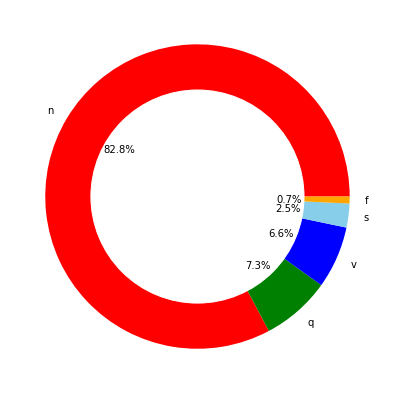

In [7]:
plt.figure(figsize=(15,7))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=['n','q','v','s','f'], 
        colors=['red','green','blue','skyblue','orange'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [8]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 20000 
random_states = [42, 123, 124, 125, 126]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[187]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [26]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
# check balanced dataset

equilibre=train_df[187].value_counts()

print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


## Save Balanced Dataset

In [11]:
train_df.to_csv(dataset_folder + 'balanced_mitbih_train.csv')

___
## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [12]:
ECG_PER_CLASS =train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [13]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
26041,0.891803,0.918033,0.622951,0.301639,0.000000,0.108197,0.114754,0.203279,0.203279,0.190164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74555,0.847458,0.813559,0.197740,0.000000,0.141243,0.180791,0.135593,0.169492,0.225989,0.197740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76281,0.895639,0.744548,0.392523,0.051402,0.056075,0.026480,0.000000,0.029595,0.090343,0.161994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80644,1.000000,0.909091,0.375000,0.000000,0.250000,0.284091,0.375000,0.409091,0.465909,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85777,0.896476,0.848018,0.778634,0.713656,0.623348,0.526432,0.419604,0.299559,0.196035,0.156388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [14]:
def plot_1_sample(class_number):
    data = ECG_PER_CLASS.iloc[class_number,:187]

    plt.plot(np.arange(0, len(data)*10, 10), data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [15]:
def plot_hist(class_number, min_, size):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[187]==class_number].values

    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    # scale x value (*10) agar bisa ditampilkan dalam satuam (ms)
    time = np.tile(np.arange(min_,size)*10, ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(time, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

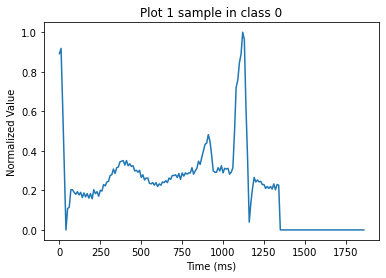

In [16]:
plot_1_sample(class_number=0)

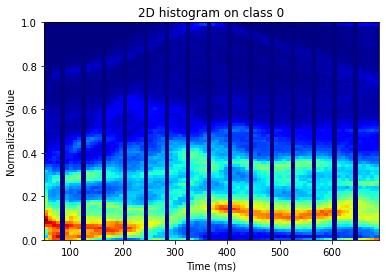

In [17]:
plot_hist(class_number=0, min_=5, size=70)

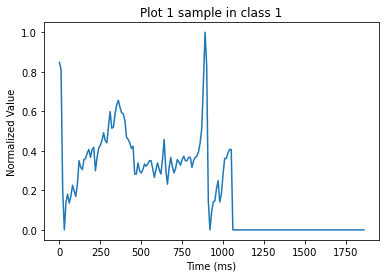

In [18]:
plot_1_sample(class_number=1)

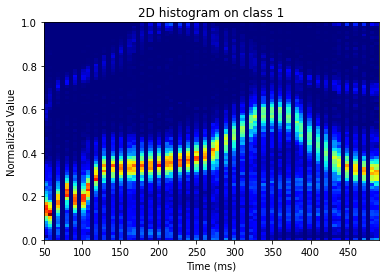

In [19]:
plot_hist(class_number=1, min_=5, size=50)

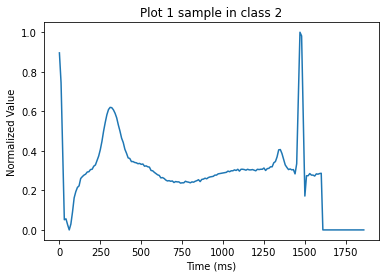

In [20]:
plot_1_sample(class_number=2)

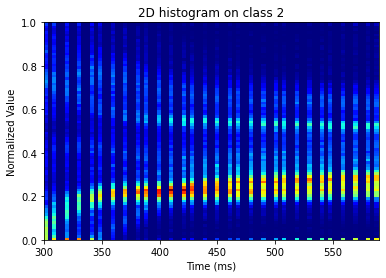

In [21]:
plot_hist(class_number=2, min_=30, size=60)

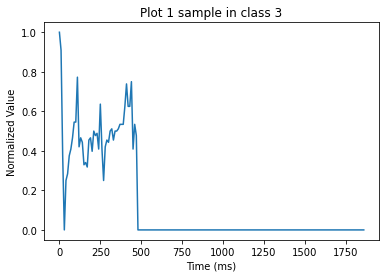

In [22]:
plot_1_sample(class_number=3)

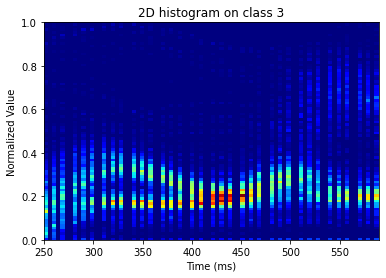

In [23]:
plot_hist(class_number=3, min_=25, size=60)

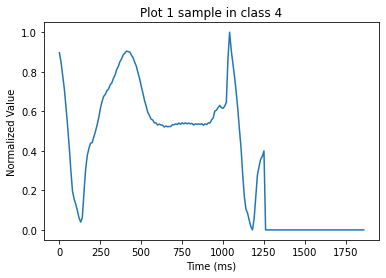

In [24]:
plot_1_sample(class_number=4)

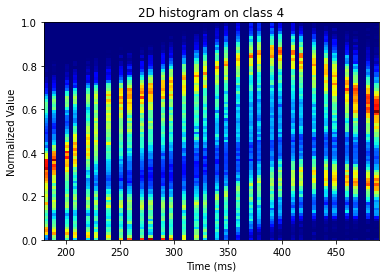

In [25]:
plot_hist(class_number=4, min_=18, size=50)